In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm

In [5]:
sample=normal(size=100)
sample


array([-0.43454662,  0.67179801, -0.54161114,  1.83689805,  0.1575986 ,
        0.03633279, -0.32039472, -1.57071305,  0.27121222,  0.98016738,
        0.42171743,  0.07059174,  2.08769553,  0.65684705,  0.05503586,
        0.29182728,  0.74566261,  0.84009291,  0.75811767, -0.98928106,
       -0.37353247,  0.74974061, -0.77082106, -0.11254124, -1.66585432,
        1.13882904,  1.56231835, -0.49193489,  0.33729566, -0.49548606,
       -0.24566635,  0.54338451,  0.41435169,  0.66511641,  0.17551315,
        0.84957623,  1.42995126, -0.20849693,  0.58001493,  1.82899764,
        0.17233309, -1.66823239, -0.44028029, -0.6951141 , -0.97721316,
       -2.02499785, -1.39661533, -0.03291456,  0.4447651 ,  0.04598177,
        0.8001033 , -0.36688333, -1.36045524,  1.81931023, -0.62364435,
       -1.02033703,  0.13932114,  0.70730688, -0.21722546,  0.56162108,
        0.0684148 ,  1.45193824,  2.49579676,  0.62626963, -0.22086744,
        0.3593985 ,  0.91886231,  0.76690672, -0.67337559,  0.98

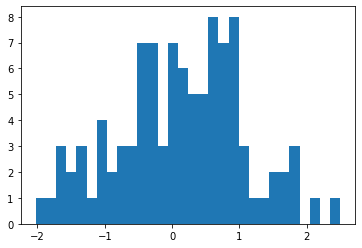

In [8]:
plt.hist(sample,bins=30)
plt.show()

### Estimacion Parametrica

In [25]:
sample=normal(loc=50,scale=5,size=1000) #mu=50 sigma=5
mu=sample.mean()
mu

50.00728789806356

In [26]:
sigma=sample.std()
sigma

5.019400079085288

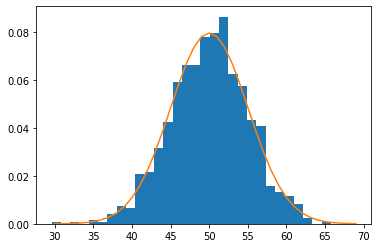

In [27]:
dist=norm(mu,sigma)
values=[value for value in range(30,70)]
probabilidades=[dist.pdf(value) for value in values]
plt.hist(sample,bins=30,density=True)
plt.plot(values,probabilidades)
plt.show()

# Estimación no paramétrica

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html

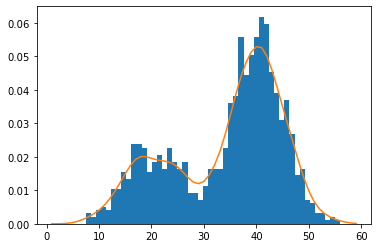

In [3]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad

plt.hist(sample, bins=50, density=True) 
plt.plot(values[:], probabilities)
plt.show()